## Deep Learning Model

In [16]:
# first neural network with keras tutorial
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from keras import callbacks



Loading Dataset

In [2]:
X_train = pd.read_pickle('dataset/overSampled_X_train.pkl')
X_test = pd.read_pickle('dataset/X_test.pkl')
y_train = pd.read_pickle('dataset/overSampled_y_train.pkl')
y_test = pd.read_pickle('dataset/y_test.pkl')
y_train.value_counts()
X_train

0    398914
1    398914
Name: isFraud, dtype: int64

Creating Neural Network

In [8]:

model = Sequential()
model.add(Dense(32, input_dim=400, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Training the Model

In [13]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = model.fit(X_train, y_train, batch_size = 128, 
                    epochs = 25, validation_data =(X_test, y_test), 
                    callbacks =[earlystopping])

# model.fit(X_train, y_train, epochs=100, batch_size=100)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
pickle.dump(model,open('neuralModel.p','wb'))

Epoch 1/25
6234/6234 [==============================] - 15s 2ms/step - loss: 0.1678 - accuracy: 0.9327 - val_loss: 0.2103 - val_accuracy: 0.9226
Epoch 2/25
6234/6234 [==============================] - 11s 2ms/step - loss: 0.1628 - accuracy: 0.9350 - val_loss: 0.2493 - val_accuracy: 0.9050
Epoch 3/25
6234/6234 [==============================] - 11s 2ms/step - loss: 0.1592 - accuracy: 0.9365 - val_loss: 0.2150 - val_accuracy: 0.9221
Epoch 4/25
6234/6234 [==============================] - 11s 2ms/step - loss: 0.1566 - accuracy: 0.9376 - val_loss: 0.2371 - val_accuracy: 0.9123
Epoch 5/25
6234/6234 [==============================] - 10s 2ms/step - loss: 0.1543 - accuracy: 0.9387 - val_loss: 0.2516 - val_accuracy: 0.9061
Epoch 6/25
5537/5537 [==============================] - 5s 941us/step - loss: 0.2103 - accuracy: 0.9226
Accuracy: 92.26
INFO:tensorflow:Assets written to: ram://f5d70fff-02fd-442a-adf3-d94c3c3bc286/assets


Testing Model

5537/5537 [==============================] - 5s 965us/step


Classification Report

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    170963
           1       0.26      0.65      0.37      6199

    accuracy                           0.92    177162
   macro avg       0.62      0.79      0.67    177162
weighted avg       0.96      0.92      0.94    177162


ROC AUC Score: 0.7934906732752542


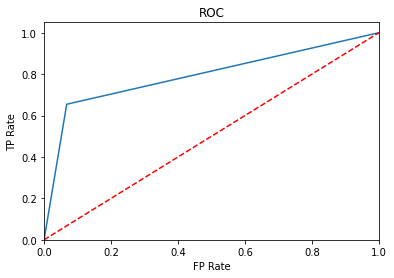

In [14]:

y_pred = model.predict(X_test)
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


# Print the Receiver operating characteristic Auc score
auc_score = roc_auc_score(y_test, y_pred)
print("\nROC AUC Score:",auc_score)

# Get False Positive rate, True Positive rate and the threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Visualize the ROC curve.
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC')
plt.show()

CNN Model

In [18]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation ="relu", input_shape = (400,)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation ="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation ="relu"))
model.add(layers.Dense(10, activation ="sigmoid"))

ValueError: Input 0 of layer "conv2d_1" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 400)